In [1]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
import os

In [9]:
DATABASE_NAME = 'ptbdb' # PhysioNet

PATIENT_ID = 'patient001'
RECORD_BASENAME = 's0010_re'

REMOTE_RECORD_DIR = f'{DATABASE_NAME}/{PATIENT_ID}/'

RAW_DATA_DIR = '../data/raw'

Download successful!

--- Record Metadata ---
Sampling Frequency: 1000 Hz
Signal Shape: (3000, 2) (samples, leads)
Signal Units: mV, mV
Lead Names: i, ii
Record Name: s0010_re

--- Plotting ECG Lead II ---


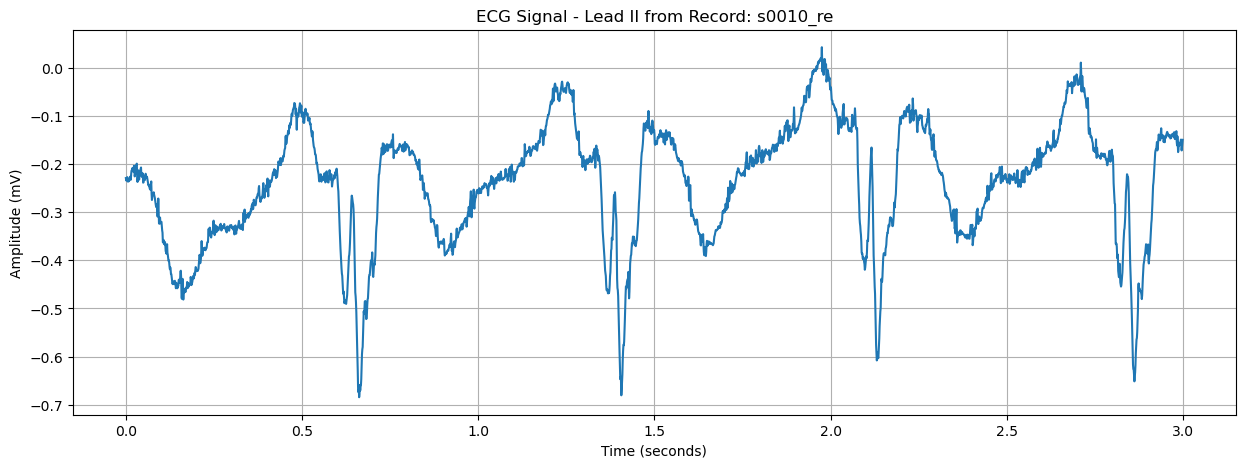

In [ ]:
try:
    # wfdb.rdrecord will download the record from the specified directory.
    record = wfdb.rdrecord(
        record_name=RECORD_BASENAME,
        pn_dir=REMOTE_RECORD_DIR,
        sampfrom=0, 
        sampto=3000, # Load the first 3000 samples (3 seconds) for a quick plot
        physical=True, # Convert signals to physical units (e.g., mV)
        channels=[0, 1] # Load only the first two channels (e.g., I and II)
    )
    
    print("Download successful!")

    signal_data = record.p_signal
    
    print("\n--- Record Metadata ---")
    print(f"Sampling Frequency: {record.fs} Hz")
    print(f"Signal Shape: {signal_data.shape} (samples, leads)")
    print(f"Signal Units: {', '.join(record.units)}")
    print(f"Lead Names: {', '.join(record.sig_name)}")
    print(f"Record Name: {record.record_name}")
    
    
    # --- Basic Visualization ---

    print("\n--- Plotting ECG Lead II ---")
    
    try:
        # Find the index for lead 'ii', a common lead for analysis
        lead_ii_index = record.sig_name.index('ii')
    except ValueError:
        print("Lead 'ii' not found, plotting the first lead instead.")
        lead_ii_index = 0
        
    ecg_signal_lead_ii = signal_data[:, lead_ii_index]
    
    # Create a time axis in seconds
    time_axis = np.arange(len(ecg_signal_lead_ii)) / record.fs

    plt.figure(figsize=(15, 5))
    plt.plot(time_axis, ecg_signal_lead_ii)
    plt.title(f"ECG Signal - Lead II from Record: {record.record_name}")
    plt.xlabel("Time (seconds)")
    plt.ylabel(f"Amplitude ({record.units[lead_ii_index]})")
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"\nAn error occurred: {e}")
    print("Please check your internet connection and the database/record names.")

